In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data = data.drop(columns=["#", "id"])

In [4]:
data.shape

(921153, 16)

In [5]:
data = data.drop_duplicates()

In [6]:
data.to_csv("Data_removed_dublicates.csv")

In [83]:
data.flight_class.unique()

array(['ECONOMY', 'BUSINESS', 'FIRST', 'PREMIUM_ECONOMY'], dtype=object)

In [7]:
921153 - 748932

172221

In [8]:
data.head()

,departure_date,departure_airport,destination_airport,departure_time,one_way,arrival_date,arrival_time,flight_time,stops_number,stops_list,flight_class,total_price,base_price,additional_services,currency,carrier_codes
0,2022-01-20,DOH,DXB,17:00:00,False,NaN,19:10:00,1H10M,0,{DXB},ECONOMY,118.52,82.0,NaN,EUR,FZ
1,2022-01-20,DOH,DXB,20:15:00,False,NaN,22:25:00,1H10M,0,{DXB},ECONOMY,118.52,82.0,NaN,EUR,FZ
2,2022-01-20,DOH,DXB,13:45:00,False,NaN,21:35:00,6H50M,1,{AMM},ECONOMY,119.82,48.0,NaN,EUR,RJ
3,2022-01-20,DOH,DXB,16:15:00,False,NaN,03:15:00,10H,1,{AMM},ECONOMY,119.82,48.0,NaN,EUR,RJ
4,2022-01-20,DOH,DXB,15:30:00,False,NaN,03:15:00,10H45M,1,{AMM},ECONOMY,119.82,48.0,NaN,EUR,RJ


In [9]:
data = data.drop(columns=["additional_services", "arrival_date", "one_way"])

In [10]:
data.head()

,departure_date,departure_airport,destination_airport,departure_time,arrival_time,flight_time,stops_number,stops_list,flight_class,total_price,base_price,currency,carrier_codes
0,2022-01-20,DOH,DXB,17:00:00,19:10:00,1H10M,0,{DXB},ECONOMY,118.52,82.0,EUR,FZ
1,2022-01-20,DOH,DXB,20:15:00,22:25:00,1H10M,0,{DXB},ECONOMY,118.52,82.0,EUR,FZ
2,2022-01-20,DOH,DXB,13:45:00,21:35:00,6H50M,1,{AMM},ECONOMY,119.82,48.0,EUR,RJ
3,2022-01-20,DOH,DXB,16:15:00,03:15:00,10H,1,{AMM},ECONOMY,119.82,48.0,EUR,RJ
4,2022-01-20,DOH,DXB,15:30:00,03:15:00,10H45M,1,{AMM},ECONOMY,119.82,48.0,EUR,RJ


In [11]:
data.stops_number.unique()

array([0, 1, 2])

In [12]:
counts = pd.DataFrame(data.groupby(by=["carrier_codes"]).count().reset_index()[["carrier_codes", "departure_date"]]).rename(columns={"departure_date" : "counts"})

In [13]:
counts

,carrier_codes,counts
0,AC,1035
1,AF,1824
2,AT,6334
3,BG,1347
4,CZ,7
5,EK,1481
6,ET,19453
7,EY,79688
8,FZ,47346
9,GP,45501


In [36]:
counts = counts.sort_values("counts", ascending=False).reset_index().drop(columns=["index"])

In [15]:
import matplotlib.pyplot as plt

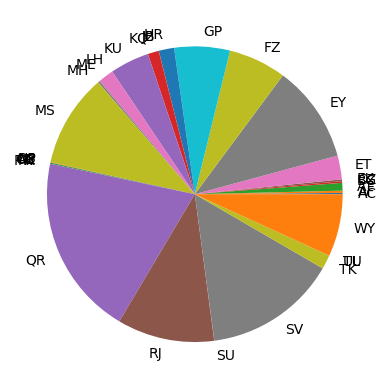

In [16]:
plt.pie(count_, labels=labels)
plt.show()

In [59]:
# N biggest players in the market
n = 13

In [60]:
big_share = list(counts.carrier_codes)[:n]

In [61]:
others = 0
for code in list(counts.carrier_codes):
    if code not in big_share:
        others += int(counts.loc[counts["carrier_codes"] == code]["counts"])

In [62]:
shares = big_share + ["others"]

In [63]:
values = []
for code in big_share:
    values.append(int(counts.loc[counts["carrier_codes"] == code]["counts"]))
values.append(others)

In [67]:
shares

['QR',
 'SV',
 'EY',
 'RJ',
 'MS',
 'WY',
 'FZ',
 'GP',
 'KU',
 'ET',
 'ME',
 'HR',
 'TK',
 'others']

In [74]:
airlines_full_names = {
    'QR' : "Qatar Airways",
    "RJ" : "Royal Jordanian",
    "SV" : "Saudia",
    "WY" : "Oman Air",
    "EY" : "Etihad Airways",
    "FZ" : "Flydubai",
    "GP" : "APG Airlines",
    "MS" : "EgyptAir",
    "KU" : "Kuwait Airways",
    "ET" : "Ethiopian Airlines",
    "TK" : "Turkish Airlines",
    "ME" : "Middle East Airlines",
    "HR" : "Hahn Air",
    "others" : "Others" 
}

In [75]:
labels = [airlines_full_names[code] for code in shares]

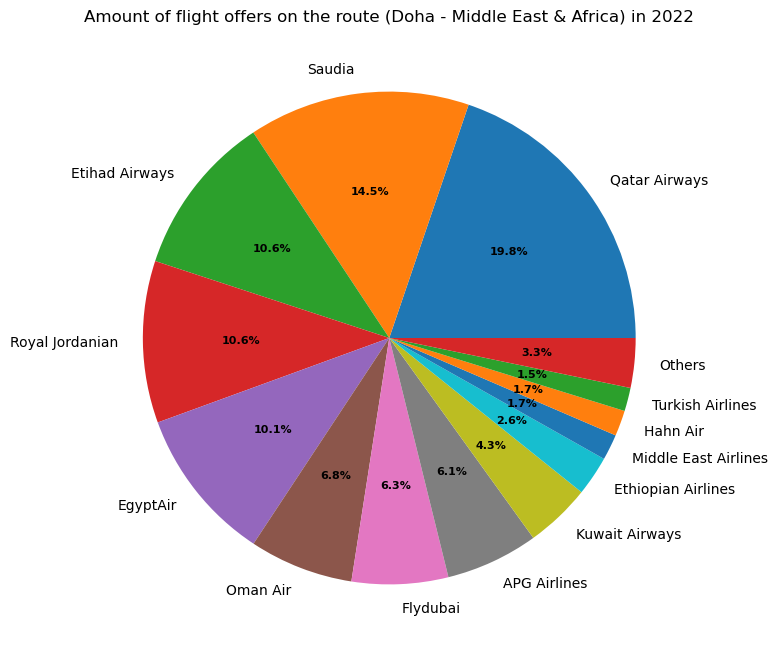

In [82]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(values,labels=labels,\
                                  normalize=True, radius=1, autopct='%1.1f%%')

plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Amount of flight offers on the route (Doha - Middle East & Africa) in 2022')
plt.savefig("AirlinesMarketShare.png", bbox_inches = 'tight')
plt.show()
plt.close()